<a href="https://colab.research.google.com/github/hakanskn/Makine-Ogrenmesi/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tanımlar ve Teorik Açıklamalar

https://miracozturk.com/python-ile-siniflandirma-analizleri-knn-k-nearest-neighbours-k-en-yakin-komsu-algoritmasi/#:~:text=En%20Yak%C4%B1n%20Kom%C5%9Fu%20Algoritmas%C4%B1%20%E2%80%93%20EYKA,%C3%B6%C4%9Frenme%20y%C3%B6ntemi%20olarak%20ifade%20edilmektedir.

https://arslanev.medium.com/makine-%C3%B6%C4%9Frenmesi-knn-k-nearest-neighbors-algoritmas%C4%B1-bdfb688d7c5f

https://www.veribilimiokulu.com/k-en-yakin-komsu-k-nearest-neighbor-siniflandirma-python-ornek-uygulama/


https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761?gi=16988425365b

En basit anlaşılabilecek makine öğrenmesi algoritmalarından biridir.

Basit bir tanım yapacak olursak;

"**Sınıfı bilinmeyen verilerin, eğitim setindeki diğer veriler ile karşılaştırılıp bir uzaklık ölçümü gerçekleştirilmesi sonucu hesaplanan uzaklığa göre henüz bir sınıfa atanamamış verinin, en ideal (optimal) sınıfa atanarak sınıflandırılması olarak ifade edilmektedir.**"

KNN  algoritması; 1950’li yılların başında Evelyn Fix ve Joseph L. Hodges Jr. tarafından geliştirilmiş, 1965 yılında N.J. Nilsson’ın minimum uzaklık sınıflayıcı çalışmaları ile gelişimi hız kazanmış ve 1967 yılında ilk olarak genişletilip istatiksel analizlere (Regresyon – Regression) yönelik kullanılması/önerilmesi Thomas M. Cover ve Peter. E. Hart tarafından gerçekleşmiştir.

Literatürde uzaklık ölçümü için bir çok yaklaşım vardır. Bunlardan bazıları aşağıdadır:

- Euclidean (Öklidyen) Uzaklık hesaplaması,
- Manhattan Uzaklık Hesaplaması,
- Chebyshev Uzaklık Hesaplaması,
- Hamming Uzaklık Hesaplaması,
- Minkowski Uzaklık Hesaplaması,
- Mahalanobis Uzaklık Hesaplaması,
- Haversiene Uzaklık Hesaplaması,
- Levenshtein Uzaklık Hesaplaması,
- Sørensen-Dice Uzaklık Hesaplaması,
- Jacckard Uzaklık Hesaplaması.

En çok bilinen ve kullanılan uzaklık ölçümü Öklid ölçümüdür.

Aşağıda formülü yer almaktadır.

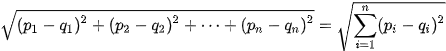

Formüldeki p ve q'lar karşılaştırılan iki örneğin aynı özniteliğini işaret etmektedir.



Artıları

- Anlaması ve yorumlaması çok basit bir algoritmadır. 
- Doğrusal olmayan veriler için çok kullanışlıdır çünkü bu algoritmada veriler hakkında herhangi bir varsayım yoktur. 
- Hem sınıflandırma hem de regresyon için kullanabileceğimiz için çok yönlü bir algoritmadır. 
- Nispeten yüksek doğruluğa sahiptir ancak KNN'den çok daha iyi denetimli öğrenme modelleri vardır.

Eksileri

- Tüm eğitim verilerini sakladığı için hesaplama açısından biraz pahalı bir algoritmadır. 
- Diğer denetimli öğrenme algoritmalarına kıyasla yüksek bellek depolaması gerekir. 
- Büyük N durumunda tahmin yavaştır.
- Gereksiz özelliklerin yanı sıra veri ölçeğine karşı da çok hassastır.

# Uygulama

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names=headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 6  0  0]
 [ 0 14  0]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.98      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


- Avantajları, Dezavantajları
- Nerelerde kullanılır?
- Örnek veri seti ile uygulama.
- Farklı parametreler ile test.
- Uygulamaları görsellerle destekleme.
- Algoritmanın karmaşıklığı.
- Hiperparametre optimizasyonu.


- Kaynaklar